In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path_male = './OUP_long_M1564_v1.xls'
path_female = './OUP_long_F1564_v1.xls'

In [3]:
df_male = pd.read_excel(path_male, skiprows=13) # Skipping the first 13 rows since they are nulls/headers
df_female = pd.read_excel(path_female, skiprows=13) # Skipping the first 13 rows since they are nulls/headers

df_male['Gender'] = 'Male'
df_female['Gender'] = 'Female'

In [4]:
# Build a concatenated df with both genders
df = pd.concat([df_male, df_female])

In [5]:
# The columns are divided into different rows, so I manually set them. This way is also easier to rename them into more meaningful names.
columns = [
    'Country',
    'Year',
    'AgeGroupFrom',
    'AgeGroupTo',
    'NoSchoolingPct',
    'CapPrimaryTotalPct',
    'CapPrimaryCompletedPct',
    'CapSecondaryTotalPct',
    'CapSecondaryCompletedPct',
    'CapTertiaryTotalPct',
    'CapTertiaryCompletedPct',
    'AvgYearsTotalSchooling',
    'AvgYearsPrimarySchooling',
    'AvgYearsSecondarySchooling',
    'AvgYearsTertiarySchooling',
    'PopulationThousands',
    'Region',
    'Gender'
]

df.columns = columns
df.head()

,Country,Year,AgeGroupFrom,AgeGroupTo,NoSchoolingPct,CapPrimaryTotalPct,CapPrimaryCompletedPct,CapSecondaryTotalPct,CapSecondaryCompletedPct,CapTertiaryTotalPct,CapTertiaryCompletedPct,AvgYearsTotalSchooling,AvgYearsPrimarySchooling,AvgYearsSecondarySchooling,AvgYearsTertiarySchooling,PopulationThousands,Region,Gender
0,Australia,1870.0,15.0,64.0,40.0,59.8,7.1,0.0,0.0,0.1,0.0,2.03,2.02,0.01,0.00,534.0,Advanced Economies,Male
1,NaN,1875.0,15.0,64.0,34.0,65.7,7.9,0.1,0.0,0.2,0.1,2.24,2.22,0.01,0.00,608.0,Advanced Economies,Male
2,NaN,1880.0,15.0,64.0,31.0,68.3,4.7,0.4,0.1,0.3,0.1,2.26,2.23,0.02,0.01,735.0,Advanced Economies,Male
3,NaN,1885.0,15.0,64.0,26.1,72.7,7.2,0.9,0.2,0.3,0.1,2.53,2.47,0.05,0.01,870.0,Advanced Economies,Male
4,NaN,1890.0,15.0,64.0,18.7,79.2,10.1,1.6,0.4,0.5,0.2,2.90,2.80,0.08,0.01,1044.0,Advanced Economies,Male


In [6]:
# The country is only set for the first row, and the following rows belong to the same column
for idx in range(df.shape[0]):
    if df.iloc[idx]['Country'] is np.nan:
        df.at[idx, 'Country'] = current_country

    else:
        current_country = df.iloc[idx]['Country']
df.head()

,Country,Year,AgeGroupFrom,AgeGroupTo,NoSchoolingPct,CapPrimaryTotalPct,CapPrimaryCompletedPct,CapSecondaryTotalPct,CapSecondaryCompletedPct,CapTertiaryTotalPct,CapTertiaryCompletedPct,AvgYearsTotalSchooling,AvgYearsPrimarySchooling,AvgYearsSecondarySchooling,AvgYearsTertiarySchooling,PopulationThousands,Region,Gender
0,Australia,1870.0,15.0,64.0,40.0,59.8,7.1,0.0,0.0,0.1,0.0,2.03,2.02,0.01,0.00,534.0,Advanced Economies,Male
1,Australia,1875.0,15.0,64.0,34.0,65.7,7.9,0.1,0.0,0.2,0.1,2.24,2.22,0.01,0.00,608.0,Advanced Economies,Male
2,Australia,1880.0,15.0,64.0,31.0,68.3,4.7,0.4,0.1,0.3,0.1,2.26,2.23,0.02,0.01,735.0,Advanced Economies,Male
3,Australia,1885.0,15.0,64.0,26.1,72.7,7.2,0.9,0.2,0.3,0.1,2.53,2.47,0.05,0.01,870.0,Advanced Economies,Male
4,Australia,1890.0,15.0,64.0,18.7,79.2,10.1,1.6,0.4,0.5,0.2,2.90,2.80,0.08,0.01,1044.0,Advanced Economies,Male


# Missing Values

In [7]:
df.isna().sum()

Country                         0
Year                          704
AgeGroupFrom                  704
AgeGroupTo                    704
NoSchoolingPct                704
CapPrimaryTotalPct            704
CapPrimaryCompletedPct        704
CapSecondaryTotalPct          704
CapSecondaryCompletedPct      704
CapTertiaryTotalPct           704
CapTertiaryCompletedPct       704
AvgYearsTotalSchooling        704
AvgYearsPrimarySchooling      704
AvgYearsSecondarySchooling    704
AvgYearsTertiarySchooling     704
PopulationThousands           704
Region                        704
Gender                          0
dtype: int64

In [8]:
# Between countries there are blank rows as a separation.
df.iloc[90:100]

,Country,Year,AgeGroupFrom,AgeGroupTo,NoSchoolingPct,CapPrimaryTotalPct,CapPrimaryCompletedPct,CapSecondaryTotalPct,CapSecondaryCompletedPct,CapTertiaryTotalPct,CapTertiaryCompletedPct,AvgYearsTotalSchooling,AvgYearsPrimarySchooling,AvgYearsSecondarySchooling,AvgYearsTertiarySchooling,PopulationThousands,Region,Gender
90,Belgium,1990.0,15.0,64.0,4.2,18.7,14.2,55.5,26.6,21.6,16.5,10.13,5.61,3.76,0.76,3360.0,Advanced Economies,Male
91,Belgium,1995.0,15.0,64.0,3.7,14.5,10.9,57.4,33.7,24.3,18.3,10.71,5.66,4.19,0.85,3377.0,Advanced Economies,Male
92,Belgium,2000.0,15.0,64.0,3.0,10.3,7.4,61.8,34.0,24.9,18.5,10.97,5.73,4.37,0.87,3418.0,Advanced Economies,Male
93,Belgium,2005.0,15.0,64.0,4.0,9.4,6.6,60.1,37.2,26.5,19.6,11.11,5.68,4.51,0.92,3461.0,Advanced Economies,Male
94,Belgium,2010.0,15.0,64.0,3.7,8.6,5.9,59.1,37.7,28.6,21.1,11.27,5.70,4.57,0.99,3514.0,Advanced Economies,Male
95,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
96,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
97,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
98,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male
99,Canada,1870.0,15.0,64.0,14.1,81.3,10.5,4.6,0.5,0.0,0.0,3.19,3.03,0.15,0.00,1016.0,Advanced Economies,Male


In [9]:
# Since the null values are shared on all the columns for the same row, those entries do not add any value to the dataset. We will drop them.
df = df.dropna(subset=['Year'])

df.isna().sum()

Country                       0
Year                          0
AgeGroupFrom                  0
AgeGroupTo                    0
NoSchoolingPct                0
CapPrimaryTotalPct            0
CapPrimaryCompletedPct        0
CapSecondaryTotalPct          0
CapSecondaryCompletedPct      0
CapTertiaryTotalPct           0
CapTertiaryCompletedPct       0
AvgYearsTotalSchooling        0
AvgYearsPrimarySchooling      0
AvgYearsSecondarySchooling    0
AvgYearsTertiarySchooling     0
PopulationThousands           0
Region                        0
Gender                        0
dtype: int64

# Understanding numeric variables

<Axes: >

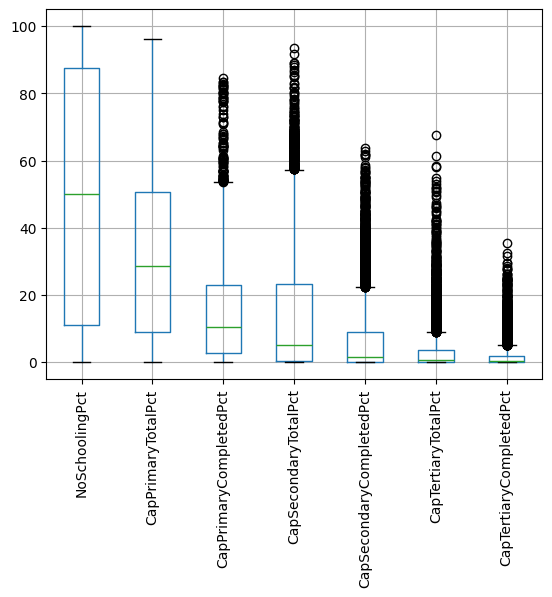

In [10]:
pct_columns = [
    'NoSchoolingPct',
    'CapPrimaryTotalPct',
    'CapPrimaryCompletedPct',
    'CapSecondaryTotalPct',
    'CapSecondaryCompletedPct',
    'CapTertiaryTotalPct',
    'CapTertiaryCompletedPct',
] 
df[pct_columns].boxplot(rot=90)

In [11]:
# Looks like all percentage are within range

In [12]:
# CHeck if there is any inconsistencie on the AgeGroups
print(df['AgeGroupFrom'].unique())
print(df['AgeGroupTo'].unique())

[15.]
[64.]


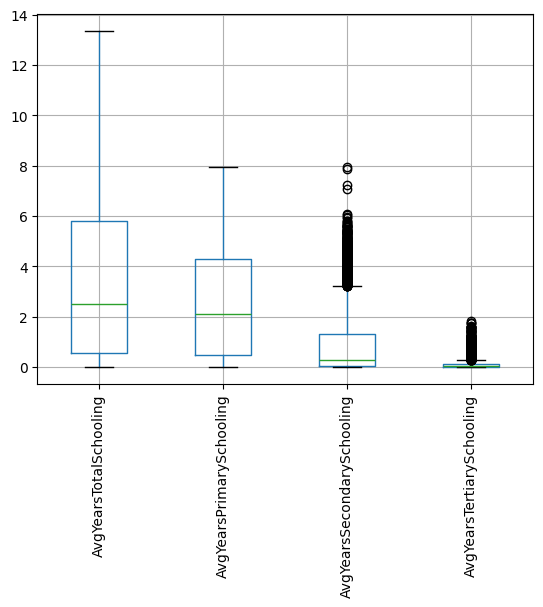

In [13]:
avg_years_columns = [
    'AvgYearsTotalSchooling',
    'AvgYearsPrimarySchooling',
    'AvgYearsSecondarySchooling',
    'AvgYearsTertiarySchooling',
]
df[avg_years_columns].boxplot(rot=90)
plt.show()

In [14]:
# The values seem to be in a normal range (no negatives, no numbers too large)

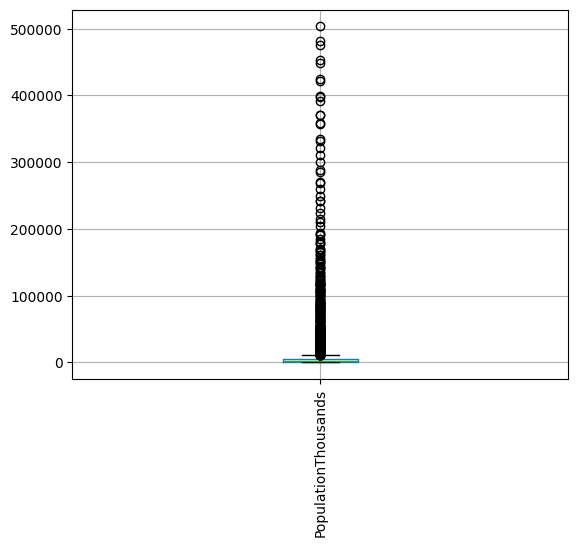

In [15]:
df[['PopulationThousands']].boxplot(rot=90)
plt.show()

In [16]:
# The population also seems to be in a normal range. 

In [17]:
# Quins rangs de dades tenim per a cada pais?
print('Des de: ', df.groupby('Country')['Year'].min().unique())
print('Fins a: ', df.groupby('Country')['Year'].max().unique())

Des de:  [1870.]
Fins a:  [2010.]


In [18]:
# Sembla que tots els paisos tenen dades des del 1870 fins al 2010

# Understanding Categoric Variables

In [19]:
print("Paisos estudiats: ", len(df['Country'].unique()))
df['Country'].unique()

Paisos estudiats:  89


array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Japan',
       'Luxembourg', 'Netherlands', 'New Zealand', 'Norway', 'Portugal',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'USA',
       'United Kingdom', 'Cambodia', 'China', 'Fiji', 'Hong Kong, China',
       'India', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines',
       'Republic of Korea', 'Sri Lanka', 'Taiwan', 'Thailand', 'Albania',
       'Bulgaria', 'Hungary', 'Poland', 'Russian Federation', 'Argentina',
       'Barbados', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica',
       'Cuba', 'Dominican Rep.', 'Ecuador', 'El Salvador', 'Guatemala',
       'Guyana', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama',
       'Paraguay', 'Peru', 'Trinidad and Tobago', 'Uruguay', 'Venezuela',
       'Algeria', 'Egypt', 'Iran', 'Iraq', 'Malta', 'Morocco', 'Syria',
       'Tunisia', 'Benin', 'Cameroon', 'Cote dIvoire', 'Ghana', 'Kenya',

In [20]:
# Hi ha en total 89 Paisos estudiats.

In [21]:
print("Regions estudiades: ", len(df['Region'].unique()))
df['Region'].unique()

Regions estudiades:  6


array(['Advanced Economies', 'Asia and the Pacific', 'Eastern Europe',
       'Latin America and the Caribbean', 'Middle East and North Africa',
       'Sub-Saharan Africa'], dtype=object)

In [22]:
# Hi ha en total 6 regions estudiades.

# Plots

In [ ]:
# Imports bàsics
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from typing import Optional

def weighted_mean(series: pd.Series, weights: pd.Series) -> float:
    """
    Retorna la mitjana ponderada, gestionant NaNs i pesos zero.
    """
    mask = ~series.isna() & ~weights.isna()
    if mask.sum() == 0:
        return np.nan
    s = series[mask]
    w = weights[mask]
    if w.sum() == 0:
        return s.mean()
    return (s * w).sum() / w.sum()


# ---------- GRAFIC 1: Tendència regional de AvgYearsTotalSchooling ----------
def plot_region_trends(df: pd.DataFrame,
                       save_html: Optional[str] = 'region_trends.html') -> go.Figure:
    """
    Crea un line chart per mostrar l'evolució mitjana (ponderada per població)
    d'AvgYearsTotalSchooling per Regió al llarg del temps.
    """
    df2 = df.copy()

    # Agrupar per Year i Region i calcular mitjana ponderada
    grouped = []
    for (y, region), sub in df2.groupby(['Year', 'Region']):
        val = weighted_mean(sub['AvgYearsTotalSchooling'], sub['PopulationThousands'])
        grouped.append({'Year': y, 'Region': region, 'AvgYearsTotalSchooling': val})
    df_region_year = pd.DataFrame(grouped).dropna()

    # Ordenem regions per nivell mitja final per a millorar llegenda/ordre
    last_year = df_region_year['Year'].max()
    order = (df_region_year[df_region_year['Year'] == last_year]
             .sort_values('AvgYearsTotalSchooling', ascending=False)['Region'].unique())

    fig = px.line(df_region_year, x='Year', y='AvgYearsTotalSchooling', color='Region',
                  category_orders={'Region': list(order)},
                  labels={
                      'AvgYearsTotalSchooling': 'Mitjana d\'anys d\'escolarització',
                      'Year': 'Any'
                  },
                  title='Evolució del nivell educatiu mitjà per regió (adults, ponderat)')
    # Millores visuals i subtitol + peus
    fig.update_traces(mode='lines+markers', hovertemplate='%{y:.2f} anys<br>%{x}')
    fig.update_layout(
        title={
            'text': 'Evolució del nivell educatiu mitjà per regió<br><sup>Adults (>=25 anys); mitjana ponderada per població</sup>',
            'x': 0.01,
            'xanchor': 'left'
        },
        legend=dict(title='Regió', orientation='h', yanchor='bottom', y=1.02, x=0.01),
        margin=dict(t=100, b=80),
        xaxis=dict(tickmode='linear'),
        yaxis=dict(range=[0, df_region_year['AvgYearsTotalSchooling'].max() * 1.12])
    )
    # Peu amb referència
    fig.add_annotation(
        text='Font: Barro-Lee dataset (preprocessat). Mitjana ponderada per PopulationThousands. Autor: usuari.',
        xref='paper', yref='paper', x=0, y=-0.18, showarrow=False, font=dict(size=10)
    )

    if save_html:
        pio.write_html(fig, file=save_html, auto_open=False)
    return fig

# ---------- GRAFIC 2: Bretxa de genere al llarg del temps ----------
def plot_gender_gap(df: pd.DataFrame,
                    save_html: Optional[str] = 'gender_gap.html') -> go.Figure:
    """
    Calcula i plota la diferència (Male - Female) en AvgYearsTotalSchooling per Region al llarg del temps.
    """
    df2 = df.copy()

    # Calcular mitjanes per Year, Region i Gender (ponderades)
    grouped = {}
    for (y, region, gender), sub in df2.groupby(['Year', 'Region', 'Gender']):
        val = weighted_mean(sub['AvgYearsTotalSchooling'], sub['PopulationThousands'])
        grouped.setdefault((y, region), {})[gender] = val
    rows = []
    for (y, region), vals in grouped.items():
        male = vals.get('Male', np.nan)
        female = vals.get('Female', np.nan)
        gap = np.nan
        if not np.isnan(male) and not np.isnan(female):
            gap = male - female
        rows.append({'Year': y, 'Region': region, 'Male': male, 'Female': female, 'GenderGap': gap})
    df_gap = pd.DataFrame(rows).dropna(subset=['GenderGap'])

    fig = px.line(df_gap, x='Year', y='GenderGap', color='Region',
                  labels={'GenderGap': 'Bretxa (Home - Dona) en anys', 'Year': 'Any'},
                  title='Evolució de la bretxa de gènere en escolarització mitjana')
    fig.update_traces(mode='lines+markers', hovertemplate='Bretxa: %{y:.2f} anys<br>Any: %{x}')
    fig.update_layout(
        title={
            'text': 'Evolució de la bretxa de gènere en escolarització mitjana<br><sup>Positiu = avantatge masculí; Negatiu = avantatge femení</sup>',
            'x': 0.01, 'xanchor': 'left'
        },
        legend=dict(title='Regió', orientation='h', yanchor='bottom', y=1.02, x=0.01),
        shapes=[dict(type='line', xref='paper', x0=0, x1=1, yref='y', y0=0, y1=0,
                     line=dict(color='black', width=1, dash='dash'))],
        margin=dict(t=100, b=80)
    )
    fig.add_annotation(
        text='Nota: Bretxa calculada com: AvgYearsTotalSchooling(Male) - AvgYearsTotalSchooling(Female). Font: Barro-Lee.',
        xref='paper', yref='paper', x=0, y=-0.18, showarrow=False, font=dict(size=10)
    )
    if save_html:
        pio.write_html(fig, file=save_html, auto_open=False)
    return fig

# ---------- GRAFIC 3: Paritat per països (scatter) ----------
def plot_parity_scatter(df: pd.DataFrame,
                        year: Optional[int] = None,
                        top_n: int = 200,
                        age_from: int = 25,
                        save_html: Optional[str] = 'parity_scatter.html') -> go.Figure:
    """
    Scatter: AvgYearsTotalSchooling (Male) vs AvgYearsTotalSchooling (Female) per pais per region.
    Mostra una línia diagonal de paritat.
    """
    df2 = df.copy()

    year = df2['Year'].max()
    df_year = df2[df2['Year'] == year]

    # Pivot per Country
    rows = []
    for (country, region), sub in df_year.groupby(['Country', 'Region']):
        male = weighted_mean(sub.loc[sub['Gender'] == 'Male', 'AvgYearsTotalSchooling'],
                             sub.loc[sub['Gender'] == 'Male', 'PopulationThousands'])
        female = weighted_mean(sub.loc[sub['Gender'] == 'Female', 'AvgYearsTotalSchooling'],
                               sub.loc[sub['Gender'] == 'Female', 'PopulationThousands'])
        pop = sub['PopulationThousands'].sum()
        rows.append({'Country': country, 'Region': region, 'Male': male, 'Female': female, 'PopulationThousands': pop})
    df_p = pd.DataFrame(rows).dropna(subset=['Male', 'Female'])

    # Opcional: mostrar només top_n per població per a claredat
    df_p = df_p.sort_values('PopulationThousands', ascending=False).head(top_n)

    fig = px.scatter(df_p, x='Male', y='Female', color='Region',
                     hover_data=['Country', 'PopulationThousands'],
                     labels={'Male': 'Avg anys (Homes)', 'Female': 'Avg anys (Dones)'},
                     title=f'Paritat de gènere en escolarització per país — Any {year}')
    # Línia de paritat
    maxaxis = max(df_p['Male'].max(), df_p['Female'].max()) * 1.06
    fig.add_shape(type='line', x0=0, x1=maxaxis, y0=0, y1=maxaxis,
                  line=dict(color='black', dash='dash'))
    # Anotar alguns països extrems: els 6 amb major desviació de la diagonal
    df_p['abs_dev'] = (df_p['Male'] - df_p['Female']).abs()
    top_dev = df_p.sort_values('abs_dev', ascending=False).head(6)
    for _, r in top_dev.iterrows():
        fig.add_annotation(x=r['Male'], y=r['Female'], text=r['Country'], showarrow=True, ax=20, ay=-10, font=dict(size=9))

    fig.update_layout(
        title={
            'text': f'Paritat de gènere en escolarització per país — Any {year}<br><sup>Cada punt és un país; línia discontínua = paritat (y=x)</sup>',
            'x': 0.01, 'xanchor': 'left'
        },
        xaxis=dict(range=[0, maxaxis]),
        yaxis=dict(range=[0, maxaxis]),
        margin=dict(t=110, b=80),
        legend=dict(title='Regió', orientation='h', yanchor='bottom', y=1.02, x=0.01)
    )
    fig.add_annotation(
        text='Font: Barro-Lee dataset (any seleccionat). Punts etiquetats: països amb major desviació de paritat.',
        xref='paper', yref='paper', x=0, y=-0.18, showarrow=False, font=dict(size=10)
    )
    if save_html:
        pio.write_html(fig, file=save_html, auto_open=False)
    return fig

# ---------- USAGE: generar i guardar les figures ----------
def generate_all(df: pd.DataFrame, output_prefix: str = ''):
    f1 = plot_region_trends(df, save_html=output_prefix + 'region_trends.html')
    f2 = plot_gender_gap(df, save_html=output_prefix + 'gender_gap.html')
    last_year = int(df['Year'].max())
    f3 = plot_parity_scatter(df, year=last_year, save_html=output_prefix + f'parity_scatter_{last_year}.html')
    print('Figures generades i guardades com HTML:')
    print(output_prefix + 'region_trends.html')
    print(output_prefix + 'gender_gap.html')
    print(output_prefix + f'parity_scatter_{last_year}.html')
    return f1, f2, f3


figs = generate_all(df, output_prefix='results/')


Figures generades i guardades com HTML:
results/region_trends.html
results/gender_gap.html
results/parity_scatter_2010.html


NameError: name 'f1' is not defined